In [1]:
import numpy as np

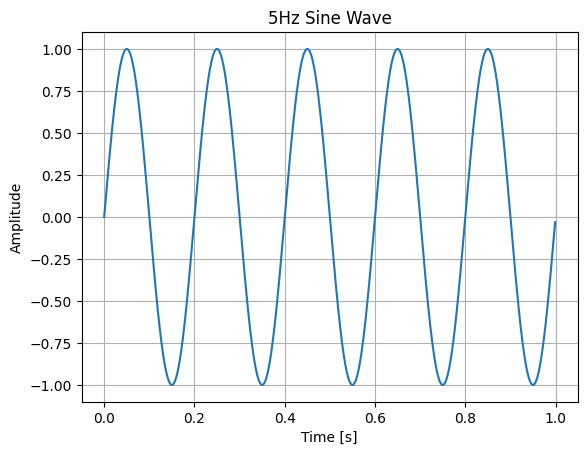

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 5        # in Hz
sampling_rate = 1000 # in samples per second
duration = 1         # in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
amplitude = 1
y = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot
plt.plot(t, y)
plt.title(f'{frequency}Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [4]:
def moving_average(signal, window_size=5):
    """
    Apply a simple moving average filter to smooth the signal.
    
    Parameters:
        signal (np.array): Input signal.
        window_size (int): Size of the moving average window.
    
    Returns:
        np.array: Smoothed signal.
    """
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')


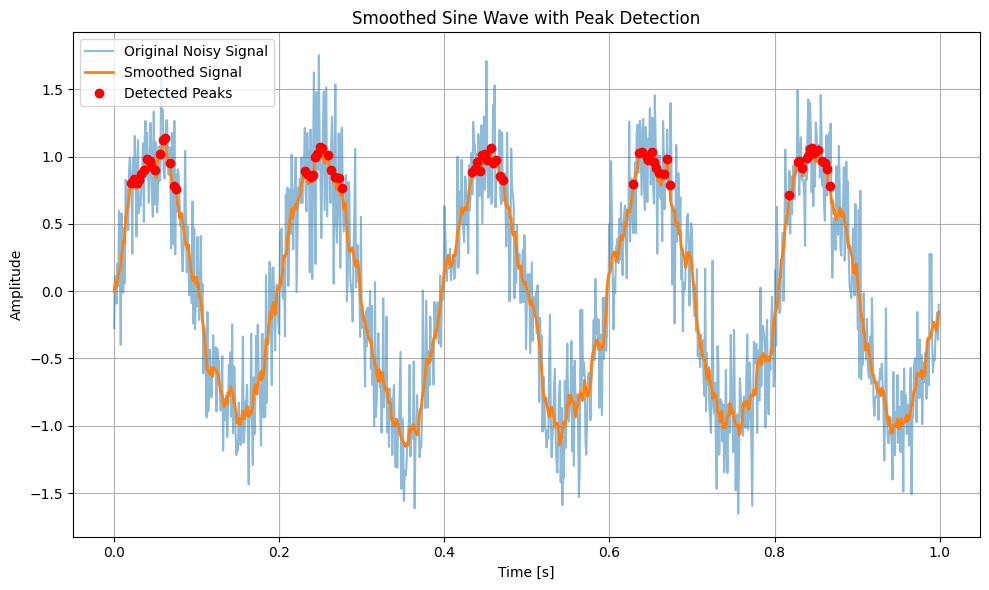

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def detect_peaks(data, threshold=0.5):
    peaks = []
    for i in range(1, len(data)-1):
        if data[i-1] < data[i] > data[i+1] and data[i] > threshold:
            peaks.append(i)
    return peaks

def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# Generate noisy sine wave
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.3 * np.random.randn(fs)

# Smooth the signal
smoothed_signal = moving_average(signal, window_size=11)

# Detect peaks on the smoothed signal
peaks = detect_peaks(smoothed_signal, threshold=0.7)

# Plot original and smoothed signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Noisy Signal', alpha=0.5)
plt.plot(t, smoothed_signal, label='Smoothed Signal', linewidth=2)
plt.plot(t[peaks], smoothed_signal[peaks], "ro", label='Detected Peaks')
plt.title("Smoothed Sine Wave with Peak Detection")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Number of peaks: 5


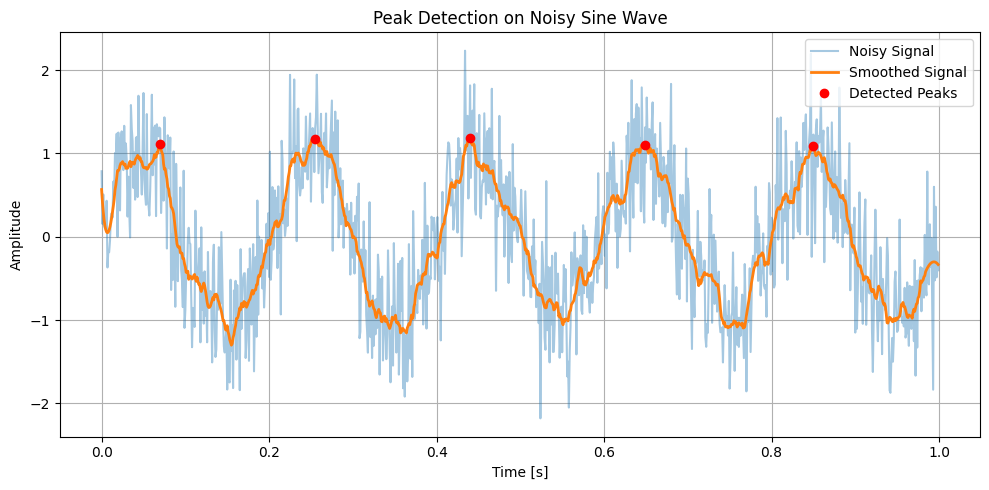

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Create noisy sine wave
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(fs)

# Step 1: Smooth the signal
smoothed = savgol_filter(signal, window_length=31, polyorder=3)

# Step 2: Detect peaks with better filtering
peaks, properties = find_peaks(
    smoothed,
    height=0.5,        # Minimum height of peak
    distance=50,       # Minimum distance between peaks (fs / freq = ~200)
    prominence=0.3     # Peak must stand out by this much
)

# Step 3: Count and plot
print(f"Number of peaks: {len(peaks)}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Noisy Signal', alpha=0.4)
plt.plot(t, smoothed, label='Smoothed Signal', linewidth=2)
plt.plot(t[peaks], smoothed[peaks], "ro", label='Detected Peaks')
plt.title("Peak Detection on Noisy Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
